## Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing the following:

##### a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis
##### b. Bivariate analysis: Linear and logistic regression modeling
##### c. Multiple Regression analysis
##### d. Also compare the results of the above analysis for the two data sets
Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st


In [ ]:
data =pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
print(data['Glucose'].value_counts())

Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
st.mode(data)

ModeResult(mode=array([ 1.   , 99.   , 70.   ,  0.   ,  0.   , 32.   ,  0.254, 22.   ,
        0.   ]), count=array([135.,  17.,  57., 227., 374.,  13.,   6.,  72., 500.]))

In [ ]:
st.skew(data)

array([ 0.89991194,  0.17341396, -1.84000523,  0.10915876,  2.26781046,
       -0.42814328,  1.9161592 ,  1.12738926,  0.6337757 ])

In [ ]:
st.kurtosis(data)

array([ 0.15038274,  0.62881333,  5.13869066, -0.52449449,  7.15957492,
        3.26125742,  5.55079205,  0.63117694, -1.59832836])

In [ ]:
data.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [ ]:
a=data['Glucose'].to_frame()

In [ ]:
print(type(a))
a

<class 'pandas.core.frame.DataFrame'>


,Glucose
0,148
1,85
2,183
3,89
4,137
...,...
763,101
764,122
765,121
766,126


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = data['Glucose'].to_frame()
y= data['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
lr = LinearRegression()
temp = lr.fit(x_train,y_train)

In [ ]:
lr.score(x_test,y_test)

0.24762836203378247

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
temp = lor.fit(x_train,y_train)

In [ ]:
lor.score(x_test,y_test)

0.7662337662337663

In [ ]:
from sklearn.metrics import classification_report

preds = lor.predict(x_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       146
           1       0.77      0.52      0.62        85

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.73       231
weighted avg       0.77      0.77      0.75       231



In [ ]:
x1 = data.drop(columns=['Outcome'])
y1= data['Outcome']
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=1)
lr1 = LinearRegression()
temp1 = lr1.fit(x1_train,y1_train)

In [ ]:
lr1.score(x1_test,y1_test)

0.3463655546089657

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

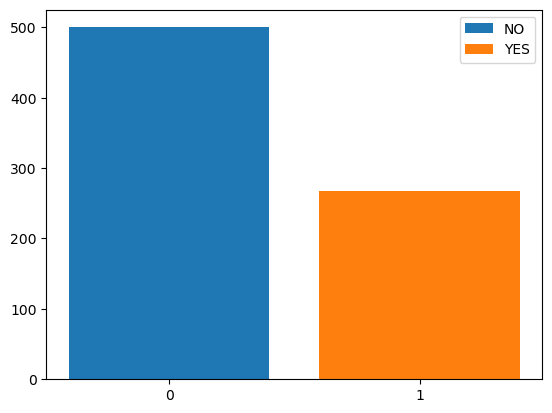

In [ ]:
plt.bar(0,y.value_counts()[0],label="NO")
plt.bar(1,y.value_counts()[1],label="YES")
plt.legend()
plt.xticks([0,1]);

<Axes: xlabel='Glucose', ylabel='count'>

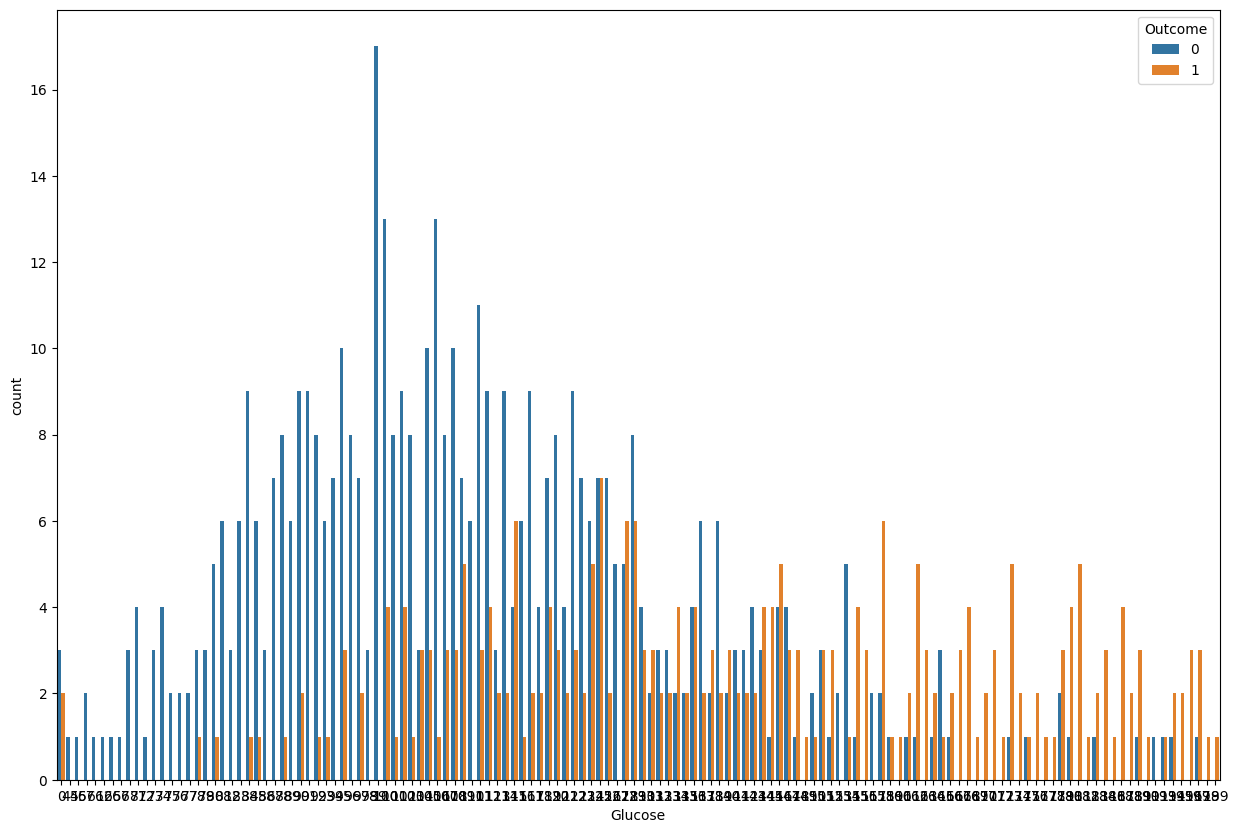

In [ ]:
fig, axes = plt.subplots(figsize=(15,10))
sns.countplot(x='Glucose', data=data, hue='Outcome',ax=axes)
